In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('CCS_200301_202204  kuchinapudi m.csv')

In [3]:
df.head()

,time,Rain
0,2003-01-01,2
1,2003-02-01,0
2,2003-03-01,17
3,2003-04-01,18
4,2003-05-01,67


In [4]:
df.tail()

,time,Rain
227,2021-12-01,1
228,2022-01-01,0
229,2022-02-01,0
230,2022-03-01,0
231,2022-04-01,1


In [5]:
df.columns=["time","Rain"]
df.head()

,time,Rain
0,2003-01-01,2
1,2003-02-01,0
2,2003-03-01,17
3,2003-04-01,18
4,2003-05-01,67


In [6]:
df['time']=pd.to_datetime(df['time'])

In [7]:
df.head()

,time,Rain
0,2003-01-01,2
1,2003-02-01,0
2,2003-03-01,17
3,2003-04-01,18
4,2003-05-01,67


In [8]:
df.set_index('time',inplace=True)

In [9]:
df.head()

,Rain
time,
2003-01-01,2
2003-02-01,0
2003-03-01,17
2003-04-01,18
2003-05-01,67


In [10]:
df.describe()

,Rain
count,232.000000
mean,136.349138
std,163.927852
min,0.000000
25%,2.750000
50%,75.000000
75%,214.000000
max,946.000000


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Rain'])

In [13]:
def adfuller_test(Rain):
    result=adfuller(Rain)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
adfuller_test(df['Rain'])

ADF Test Statistic : -4.533414918703894
p-value : 0.00017103682537858442
#Lags Used : 15
Number of Observations Used : 216
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
df['Sales First Difference'] = df['Rain'] - df['Rain'].shift(1)

In [16]:
df['Rain'].shift(1)

time
2003-01-01      NaN
2003-02-01      2.0
2003-03-01      0.0
2003-04-01     17.0
2003-05-01     18.0
              ...  
2021-12-01    308.0
2022-01-01      1.0
2022-02-01      0.0
2022-03-01      0.0
2022-04-01      0.0
Name: Rain, Length: 232, dtype: float64

In [17]:
df['Seasonal First Difference']=df['Rain']-df['Rain'].shift(12)

In [18]:
df.head(14)

,Rain,Sales First Difference,Seasonal First Difference
time,,,
2003-01-01,2,NaN,NaN
2003-02-01,0,-2.0,NaN
2003-03-01,17,17.0,NaN
2003-04-01,18,1.0,NaN
2003-05-01,67,49.0,NaN
2003-06-01,279,212.0,NaN
2003-07-01,357,78.0,NaN
2003-08-01,143,-214.0,NaN
2003-09-01,209,66.0,NaN


In [19]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.601773283236718
p-value : 2.37886146035406e-11
#Lags Used : 11
Number of Observations Used : 208
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='time'>

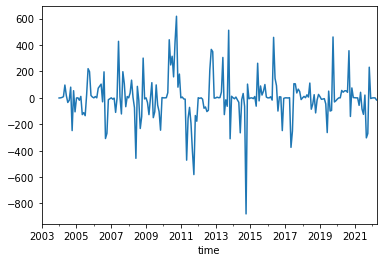

In [20]:
df['Seasonal First Difference'].plot()

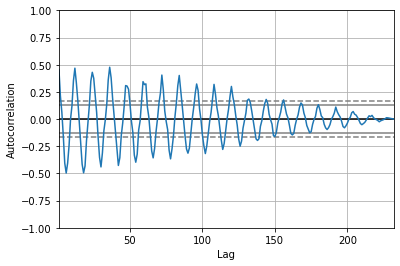

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rain'])
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

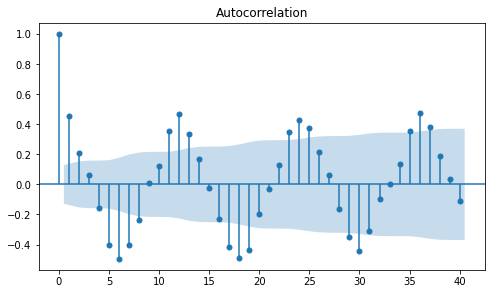

In [23]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Rain'].iloc[1:],lags=40,ax=ax1)

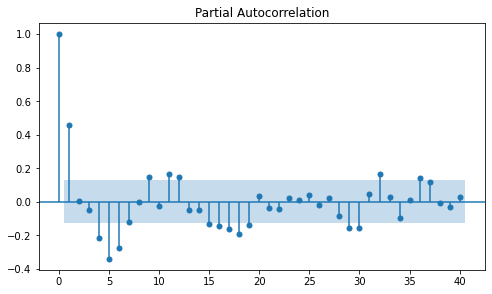

In [24]:
fig = plt.figure(figsize=(8,10))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df['Rain'].iloc[1:],lags=40,ax=ax2)

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model=ARIMA(df['Rain'],order=(1,1,0))
model_fit=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rain   No. Observations:                  231
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1505.808
Method:                       css-mle   S.D. of innovations            163.946
Date:                Wed, 18 May 2022   AIC                           3017.616
Time:                        15:25:36   BIC                           3027.943
Sample:                    02-01-2003   HQIC                          3021.781
                         - 04-01-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0043      8.459     -0.001      1.000     -16.584      16.575
ar.L1.D.Rain    -0.2764      0.063     -4.383      0.000      -0.400      -0.153
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.6183           +0.0000j            3.6183            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='time'>

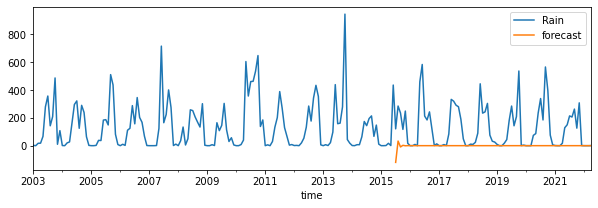

In [28]:
df['forecast']=model_fit.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(10,3))

In [29]:
import statsmodels.api as sm

In [30]:
model=sm.tsa.statespace.SARIMAX(df['Rain'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='time'>

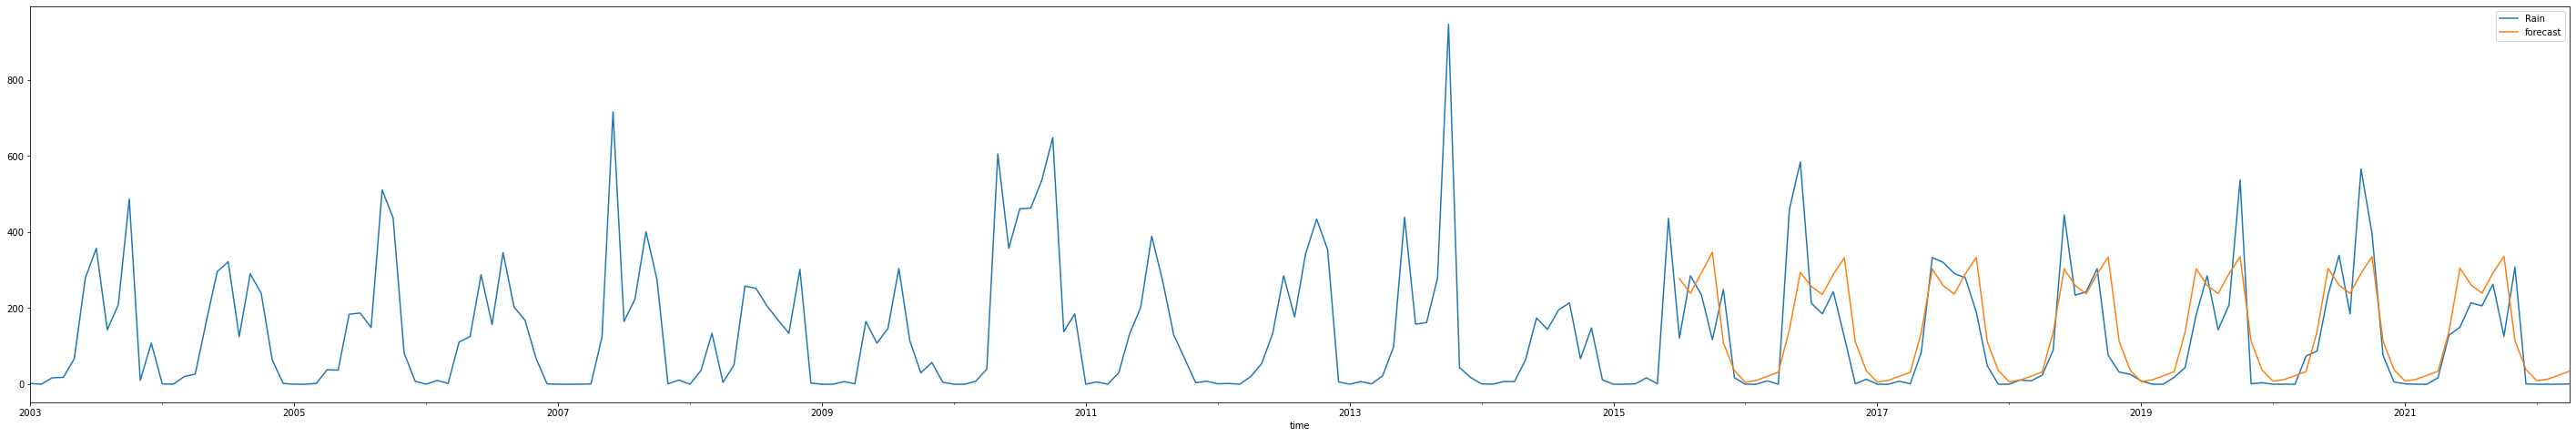

In [31]:
df['forecast']=results.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(50,8))

In [32]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [33]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [34]:
future_datest_df.tail()

,Rain,Sales First Difference,Seasonal First Difference,forecast
2026-11-01,NaN,NaN,NaN,NaN
2026-12-01,NaN,NaN,NaN,NaN
2027-01-01,NaN,NaN,NaN,NaN
2027-02-01,NaN,NaN,NaN,NaN
2027-03-01,NaN,NaN,NaN,NaN


In [35]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

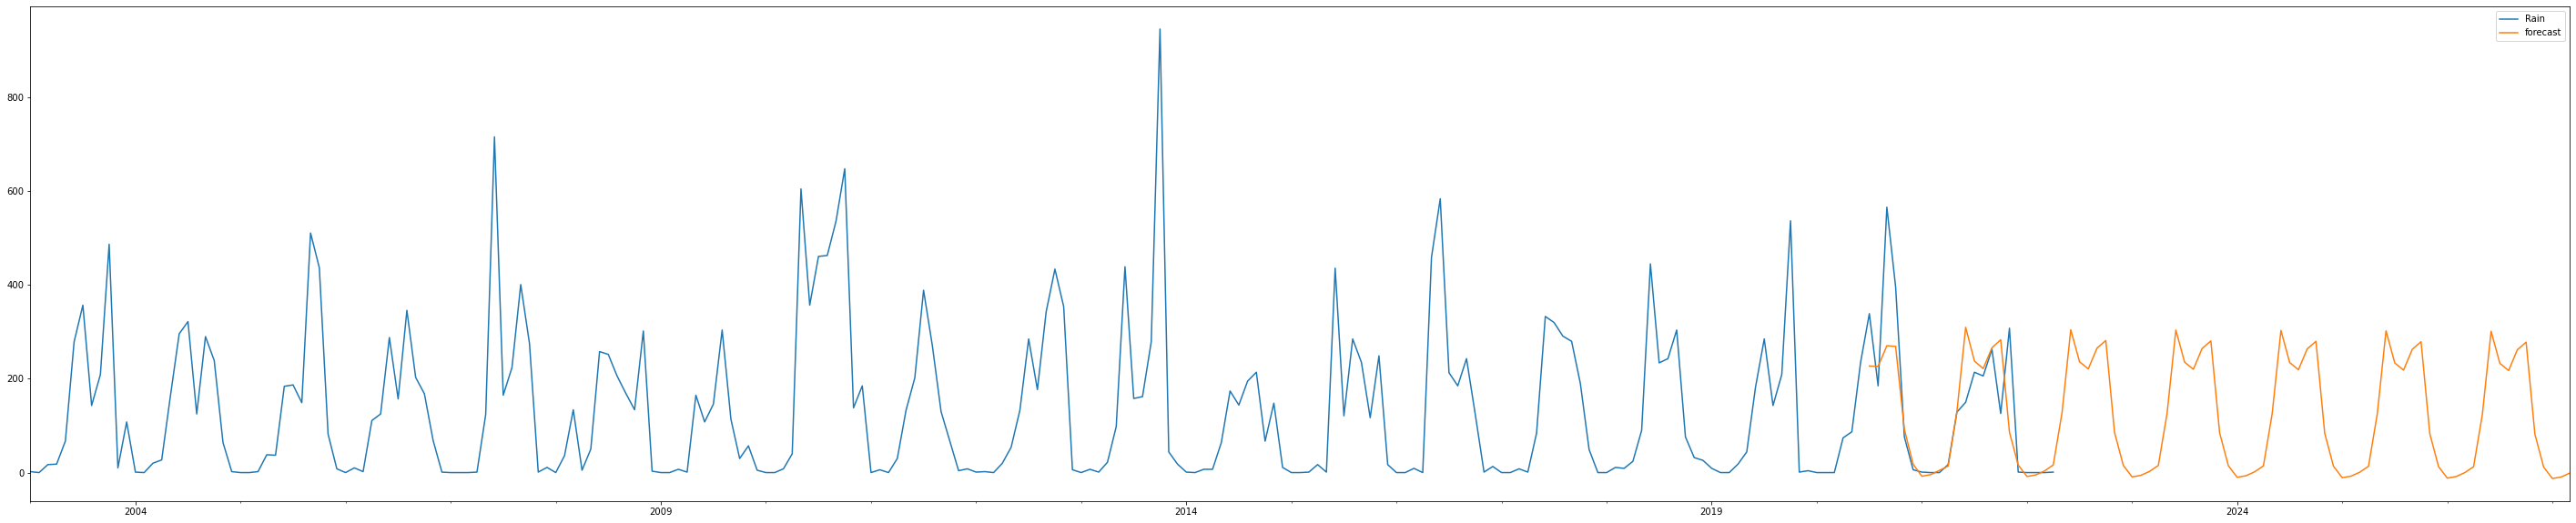

In [36]:
future_df['forecast'] = results.predict(start = 210, end = 291, dynamic= True)  
future_df[['Rain','forecast']].plot(figsize=(50,10))

In [37]:
future_df['forecast'].tail(60)

2022-04-01     16.222254
2022-05-01    127.288856
2022-06-01    304.665386
2022-07-01    236.326549
2022-08-01    221.101904
2022-09-01    265.526018
2022-10-01    281.591732
2022-11-01     85.422884
2022-12-01     15.295569
2023-01-01     -9.201332
2023-02-01     -5.964416
2023-03-01      2.542412
2023-04-01     15.164602
2023-05-01    126.561250
2023-06-01    304.036648
2023-07-01    235.494233
2023-08-01    220.220574
2023-09-01    264.646107
2023-10-01    280.770503
2023-11-01     84.537388
2023-12-01     14.423893
2024-01-01    -10.069134
2024-02-01     -6.832830
2024-03-01      1.672390
2024-04-01     14.306182
2024-05-01    125.684231
2024-06-01    303.154057
2024-07-01    234.623115
2024-08-01    219.352218
2024-09-01    263.777671
2024-10-01    279.898760
2024-11-01     83.669266
2024-12-01     13.554992
2025-01-01    -10.938253
2025-02-01     -7.701914
2025-03-01      0.803397
2025-04-01     13.436535
2025-05-01    124.815631
2025-06-01    302.285771
2025-07-01    233.754183
